# 实例1：从一组看似混乱的数据中找出$y\approx 2x$ 的规律
### 使用神经网络找出其中的规律
### 1. 准备数据
y=2x + noise

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x + noise

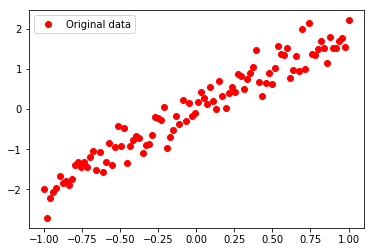

In [3]:
plt.plot(train_X, train_Y, 'ro', label = 'Original data')
plt.legend()
plt.show()

### 2. 搭建模型
* placeholder占位符X,Y
* W,b初始化随机[-1,1]参数

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [5]:
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.zeros([1]), name = "bias")
z = tf.multiply(X, W) + b

Instructions for updating:
Colocations handled automatically by placer.


* 反向传播

In [6]:
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


* 训练模型
* 可视化

In [7]:
# 初始化所有变量
init = tf.global_variables_initializer()
# 定义参数
training_epochs = 20
display_step = 2

In [8]:
plottdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

Epoch: 1 cost= 0.7557078 W= [0.7214475] b= [0.35542127]
Epoch: 3 cost= 0.1474243 W= [1.6094706] b= [0.11747434]
Epoch: 5 cost= 0.09202065 W= [1.8502718] b= [0.02679843]
Epoch: 7 cost= 0.08676976 W= [1.9127239] b= [0.00286189]
Epoch: 9 cost= 0.08602997 W= [1.9288754] b= [-0.00333569]
Epoch: 11 cost= 0.08588005 W= [1.9330516] b= [-0.00493819]
Epoch: 13 cost= 0.08584406 W= [1.9341311] b= [-0.00535254]
Epoch: 15 cost= 0.08583492 W= [1.9344107] b= [-0.00545979]
Epoch: 17 cost= 0.08583256 W= [1.9344833] b= [-0.00548763]
Epoch: 19 cost= 0.08583197 W= [1.9345018] b= [-0.00549479]
FInished!
cost= 0.08583186 W= [1.934505] b= [-0.00549596]


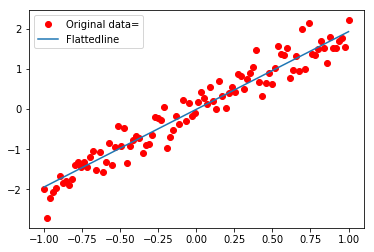

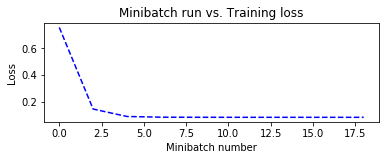

x=0.2, z= [0.38140503]


In [9]:
# 启动session
with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batchsize":[],'loss':[]}
    
    # 向模型输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", epoch+1, "cost=", loss, "W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
                    
    print("FInished!")
    
# 可视化
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y:train_Y}), "W=", sess.run(W),"b=", sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label='Original data=')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Flattedline')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    plt.show()
    
# 使用模型
    print("x=0.2, z=", sess.run(z, feed_dict={X: 0.2}))

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


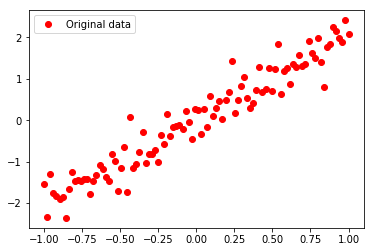

Instructions for updating:
Colocations handled automatically by placer.
Epoch: 1 cost= 0.54173094 W= [0.91933036] b= [0.01537189]
Epoch: 3 cost= 0.13771164 W= [1.7587615] b= [0.01768087]
Epoch: 5 cost= 0.11135775 W= [1.9731542] b= [0.01772148]
Epoch: 7 cost= 0.10963867 W= [2.027911] b= [0.01772219]
Epoch: 9 cost= 0.10952654 W= [2.0418963] b= [0.01772219]
Epoch: 11 cost= 0.10951922 W= [2.0454671] b= [0.01772219]
Epoch: 13 cost= 0.109518744 W= [2.046379] b= [0.01772219]
Epoch: 15 cost= 0.10951872 W= [2.0466113] b= [0.01772219]
Epoch: 17 cost= 0.10951872 W= [2.0466733] b= [0.01772219]
Epoch: 19 cost= 0.10951872 W= [2.0466747] b= [0.01772219]
 Finished!
cost= 0.10951872 W= [2.0466747] b= [0.01772219]


In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt




#生成模拟数据
train_X =np.float32( np.linspace(-1, 1, 100))
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
#图形显示
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()


# 创建模型

# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
# 前向结构
z = tf.multiply(W, train_X)+ b

#反向优化
cost =tf.reduce_mean( tf.square(train_Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# 初始化变量
init = tf.global_variables_initializer()
#参数设置
training_epochs = 20
display_step = 2

# 启动session
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer)

        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost)
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))


    print (" Finished!")
    print ("cost=", sess.run(cost), "W=", sess.run(W), "b=", sess.run(b))